Solving the [2023 Week 6 Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/06-trees/homework.md)

# Section 1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
ocean_proximity_filter = (data['ocean_proximity']=='<1H OCEAN') | (data['ocean_proximity']=='INLAND')

housing_df = data[ocean_proximity_filter].reset_index(drop=True)

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [6]:
housing_df.fillna(0, inplace=True)  # replace null values with 0's
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [7]:
housing_df['median_house_value'] = np.log1p(housing_df.median_house_value)  # applies log transformation to the target variable
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN


In [8]:
# train, val, test split
fulltrain_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(fulltrain_df, test_size=0.25, random_state=1)

X_train = train_df.copy()
y_train = X_train.pop('median_house_value').values

dv = DictVectorizer(sparse=False)  # initialises Dict Vectorizer

# converts DataFrame to dictionary and fits Dict Vectorizer
X_train = dv.fit_transform(X_train.to_dict(orient='records'))

type(X_train), type(y_train), len(y_train), len(train_df)

(numpy.ndarray, numpy.ndarray, 9411, 9411)

# Section 2

In [9]:
from tqdm import tqdm

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 
* Train a model with `max_depth=1`.

Which feature is used for splitting the data?

In [10]:
dtr = DecisionTreeRegressor(max_depth=1)  # initialises a Decision Tree with only one node
dtr.fit(X_train, y_train)  # fits the Decision Tree to training data

dtr

DecisionTreeRegressor(max_depth=1)

In [11]:
print(export_text(dtr, feature_names=dv.feature_names_))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



**Answer**: `ocean_proximity`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

In [12]:
rfr = RandomForestRegressor(  # initialises random forest with 10 trees
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)

rfr.fit(X_train, y_train)  # fits random forest model to training data

rfr

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [13]:
# prepares validation data

X_val = val_df.copy()
y_val = X_val.pop('median_house_value').values
X_val = dv.transform(X_val.to_dict(orient='records'))

len(X_val), len(val_df), type(X_val)

(3138, 3138, numpy.ndarray)

In [14]:
y_pred = rfr.predict(X_val)  # makes predictions with trained random forest model
rmse = mean_squared_error(y_val, y_pred, squared=False)  # computes RMSE based on true and predicted y values

rmse

0.24459962783255348

**Answer**: 0.245

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving?<br>
Consider 3 decimal places for retrieving the answer.

In [15]:
n_estim = np.arange(10, 201, 10)
rmse_scores = []

for n in tqdm(n_estim):
    rfr_ = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    
    rfr_.fit(X_train, y_train)

    y_pred_ = rfr_.predict(X_val)

    rmse_ = mean_squared_error(y_val, y_pred_, squared=False)
    rmse_scores.append(rmse_)



100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.50s/it]


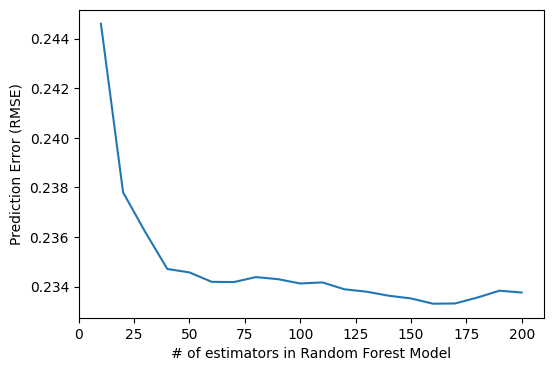

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_estim, rmse_scores)  # plots response in RMSE to change in # of estimators

ax.set_xlim(0, 210)
ax.set_xlabel('# of estimators in Random Forest Model')
ax.set_ylabel('Prediction Error (RMSE)')
plt.show()

**Answer**: 50

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

In [17]:
n_estim = np.arange(10, 201, 10)
depths = [10, 15, 20, 25]
rmse_scores = []

for d in tqdm(depths):
    for n in n_estim:
        rfr_ = RandomForestRegressor(  # initialises random forest
            max_depth=d,
            n_estimators=n,
            random_state=1,
            n_jobs=-1
        )
        
        rfr_.fit(X_train, y_train)
    
        y_pred_ = rfr_.predict(X_val)
        rmse_ = mean_squared_error(y_val, y_pred_, squared=False)
        
        rmse_scores.append(dict(  # appends a dictionary to track relevant information
            depth = rfr_.max_depth,
            n_est = rfr_.n_estimators,
            rmse = rmse_
        ))



100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:40<00:00, 25.15s/it]


In [18]:
rmse_df = pd.DataFrame(rmse_scores)
rmse_df.sort_values('rmse').head()

,depth,n_est,rmse
76,25,170,0.233400
75,25,160,0.233410
74,25,150,0.233472
73,25,140,0.233573
77,25,180,0.233590


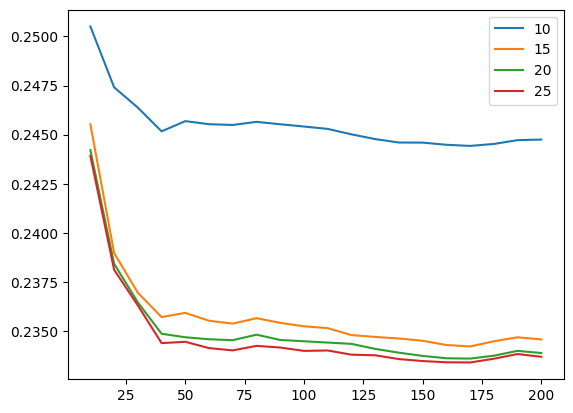

In [20]:
for d in [10, 15, 20, 25]:
    df_subset = rmse_df[rmse_df.depth == d]
    plt.plot(df_subset.n_est, df_subset.rmse, label=d)

plt.legend()
plt.show()

**Answer**: 25

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [21]:
rfr = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1,
)

rfr.fit(X_train, y_train)

# identifies the most important feature by finding the position where 
# the random forest model's feature_importances_ attribute is maximum
dv.feature_names_[np.argmax(rfr.feature_importances_)]



'median_income'

**Answer**: `median_income`

# Section 3

In [23]:
import xgboost as xgb

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [24]:
Dtrain = xgb.DMatrix(X_train, y_train)
Dval = xgb.DMatrix(X_val, y_val)

evallist = [(Dtrain, 'train'), (Dval, 'eval')]  # specifies evaluation sets to watch performance

xgb_params = {
    'eta': 0.3,  # learning rate
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',  # for regression, uses RMSE
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

num_round = 100
bst = xgb.train(xgb_params, Dtrain, num_round, evals=evallist)

[0]	train-rmse:8.07362	eval-rmse:8.07348
[1]	train-rmse:5.65832	eval-rmse:5.65617
[2]	train-rmse:3.96917	eval-rmse:3.96541
[3]	train-rmse:2.78836	eval-rmse:2.78530
[4]	train-rmse:1.96409	eval-rmse:1.96088
[5]	train-rmse:1.38983	eval-rmse:1.38852
[6]	train-rmse:0.99273	eval-rmse:0.99253
[7]	train-rmse:0.71854	eval-rmse:0.72138
[8]	train-rmse:0.53440	eval-rmse:0.54054
[9]	train-rmse:0.41016	eval-rmse:0.42108
[10]	train-rmse:0.33195	eval-rmse:0.34802
[11]	train-rmse:0.28413	eval-rmse:0.30539
[12]	train-rmse:0.25487	eval-rmse:0.28044
[13]	train-rmse:0.23748	eval-rmse:0.26681
[14]	train-rmse:0.22789	eval-rmse:0.25955
[15]	train-rmse:0.22197	eval-rmse:0.25614
[16]	train-rmse:0.21543	eval-rmse:0.25268
[17]	train-rmse:0.21034	eval-rmse:0.24871
[18]	train-rmse:0.20688	eval-rmse:0.24786
[19]	train-rmse:0.20341	eval-rmse:0.24612
[20]	train-rmse:0.20036	eval-rmse:0.24508
[21]	train-rmse:0.19827	eval-rmse:0.24376
[22]	train-rmse:0.19644	eval-rmse:0.24257
[23]	train-rmse:0.19320	eval-rmse:0.24095
[2

In [25]:
xgb_params['eta'] = 0.1

xgb_params

{'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'nthread': 8,
 'seed': 1,
 'verbosity': 1}

In [26]:
num_round = 100
bst = xgb.train(xgb_params, Dtrain, num_round, evals=evallist)

[0]	train-rmse:10.37456	eval-rmse:10.37545
[1]	train-rmse:9.33895	eval-rmse:9.33910
[2]	train-rmse:8.40699	eval-rmse:8.40694
[3]	train-rmse:7.56827	eval-rmse:7.56760
[4]	train-rmse:6.81351	eval-rmse:6.81222
[5]	train-rmse:6.13433	eval-rmse:6.13236
[6]	train-rmse:5.52318	eval-rmse:5.52066
[7]	train-rmse:4.97329	eval-rmse:4.97019
[8]	train-rmse:4.47854	eval-rmse:4.47532
[9]	train-rmse:4.03346	eval-rmse:4.03005
[10]	train-rmse:3.63299	eval-rmse:3.62939
[11]	train-rmse:3.27269	eval-rmse:3.26930
[12]	train-rmse:2.94855	eval-rmse:2.94514
[13]	train-rmse:2.65703	eval-rmse:2.65359
[14]	train-rmse:2.39479	eval-rmse:2.39150
[15]	train-rmse:2.15901	eval-rmse:2.15616
[16]	train-rmse:1.94714	eval-rmse:1.94442
[17]	train-rmse:1.75677	eval-rmse:1.75478
[18]	train-rmse:1.58567	eval-rmse:1.58404
[19]	train-rmse:1.43206	eval-rmse:1.43081
[20]	train-rmse:1.29412	eval-rmse:1.29329
[21]	train-rmse:1.17023	eval-rmse:1.17013
[22]	train-rmse:1.05934	eval-rmse:1.05983
[23]	train-rmse:0.95998	eval-rmse:0.96117


**Answer**: Both give equal value